**Importing the needed libraries**

In [1]:
import os
import plotly as py
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.colors as pc
import plotly.express as px
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**Loading Data**

In [2]:
data_frames = []

for root, dirs, files in os.walk("/kaggle/input/hespress"):
    for file in files:
        if file.startswith('stories_') and file.endswith('.csv'):
            file_path = os.path.join(root, file)
            data_frames.append(pd.read_csv(file_path))

df = pd.concat(data_frames, ignore_index=True)

In [3]:
df.head()

,Unnamed: 0,id,title,date,author,story,topic
0,0,9d9ebd0204f811eb92ec646e69d991ea,"شهادة طبيب جراح ""تورط"" قنصلا بتر أصبع مسنة",الجمعة 02 أكتوبر 2020 - 20:08,هسبريس من الدار البيضاء,قررت الغرفة الجنائية بمحكمة الاستئناف بمدينة ا...,faits-divers
1,1,9e96ecc604f811eb836a646e69d991ea,"إحباط تهريب أكثر من طن من ""الحشيش"" بأكادير",الجمعة 02 أكتوبر 2020 - 19:37,رشيد بيجيكن من أكادير,تمكنت المصلحة الولائية للشرطة القضائية بمدينة ...,faits-divers
2,2,9fc1ec4204f811eb8619646e69d991ea,كمين أمن الصويرة يسقط شبكة هجرة غير نظامية,الجمعة 02 أكتوبر 2020 - 18:35,ابراهيم مغراوي من مراكش,أوقفت عناصر فرقة الشرطة القضائية بالمنطقة الإق...,faits-divers
3,3,a0a2fa9c04f811eb8580646e69d991ea,"""تلميذة زاكورة"" تتهم زوج أختها باستغلالها جنسيا",الجمعة 02 أكتوبر 2020 - 14:20,هسبريس من زاكورة,كشف مصدر أمني مسؤول أن التلميذة المتحدرة من جم...,faits-divers
4,4,a2d0124a04f811eba88f646e69d991ea,"""أحجار كريمة مزيفة"" تورط أشخاصا بمدينة أكادير",الجمعة 02 أكتوبر 2020 - 10:05,رشيد بيجيكن من أكادير,تمكنت عناصر المصلحة الولائية للشرطة القضائية ب...,faits-divers


In [4]:
df.drop(columns=['Unnamed: 0','id', 'author', 'topic'],inplace=True)


**removing unnecessary columns**

In [5]:
df.head()

,title,date,story
0,"شهادة طبيب جراح ""تورط"" قنصلا بتر أصبع مسنة",الجمعة 02 أكتوبر 2020 - 20:08,قررت الغرفة الجنائية بمحكمة الاستئناف بمدينة ا...
1,"إحباط تهريب أكثر من طن من ""الحشيش"" بأكادير",الجمعة 02 أكتوبر 2020 - 19:37,تمكنت المصلحة الولائية للشرطة القضائية بمدينة ...
2,كمين أمن الصويرة يسقط شبكة هجرة غير نظامية,الجمعة 02 أكتوبر 2020 - 18:35,أوقفت عناصر فرقة الشرطة القضائية بالمنطقة الإق...
3,"""تلميذة زاكورة"" تتهم زوج أختها باستغلالها جنسيا",الجمعة 02 أكتوبر 2020 - 14:20,كشف مصدر أمني مسؤول أن التلميذة المتحدرة من جم...
4,"""أحجار كريمة مزيفة"" تورط أشخاصا بمدينة أكادير",الجمعة 02 أكتوبر 2020 - 10:05,تمكنت عناصر المصلحة الولائية للشرطة القضائية ب...


**conterpution of stories over the years**

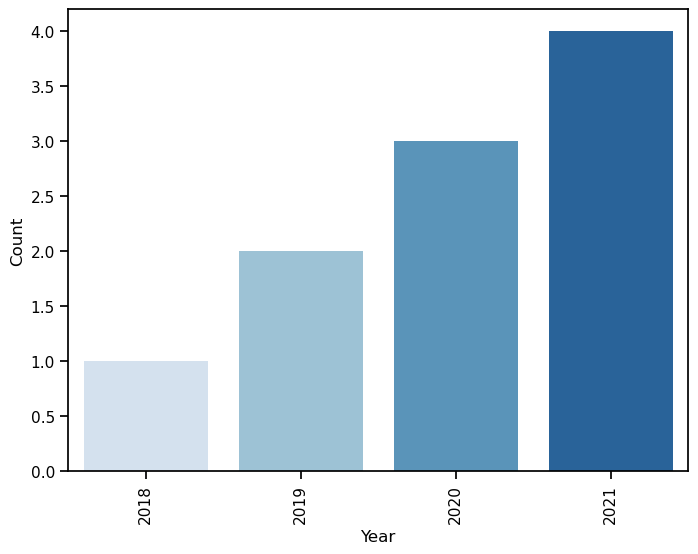

In [6]:
data = {
    'years': [2018, 2019, 2019, 2020, 2020, 2020, 2021, 2021, 2021, 2021],
}

# DataFrame from the sample data
Data_Stories = pd.DataFrame(data)

year_counts = Data_Stories['years'].value_counts().sort_values(ascending=True)
n_colors = len(year_counts)
custom_colors = sns.color_palette("Blues", n_colors=n_colors)

sns.set_context("notebook")
plt.figure(figsize=(8, 6))

sns.barplot(x=year_counts.index, y=year_counts, palette=custom_colors, order=year_counts.index)

plt.xticks(rotation=90)

plt.xlabel('Year')
plt.ylabel('Count')

plt.show()

In [7]:
data_frames = []
for root, dirs, files in os.walk("/kaggle/input/hespress"):
    for file in files:
        if file.startswith('comments_') and file.endswith('.csv'):
            file_path = os.path.join(root, file)
            data_frames.append(pd.read_csv(file_path))

df = pd.concat(data_frames, ignore_index=True)

In [8]:
df.head()

,Unnamed: 0,postId,comment,score,topic
0,0,07b94f7404ee11eb89f9646e69d991ea,سيذكر التاريخ أن سياح أجانب دخلوا المغرب و موا...,428,marocains-du-monde
1,1,07b94f7404ee11eb89f9646e69d991ea,الحكومات لي كتحتارم شعوبها،رجعت مواطنين الحاصل...,303,marocains-du-monde
2,2,07b94f7404ee11eb89f9646e69d991ea,وايلي حتى فات الفوت عاد سولني كيف ابقيت ويلي و...,154,marocains-du-monde
3,3,07b94f7404ee11eb89f9646e69d991ea,الله اعلم لماذا كل هذا التأخر!!! شكرا على ستة ...,107,marocains-du-monde
4,4,07b94f7404ee11eb89f9646e69d991ea,لقد تأخرت السلطات المغربية كثيرا لإعادة هؤلاء ...,169,marocains-du-monde


In [9]:
df.drop(columns=['Unnamed: 0','postId', 'score'],inplace=True)
df.head()

,comment,topic
0,سيذكر التاريخ أن سياح أجانب دخلوا المغرب و موا...,marocains-du-monde
1,الحكومات لي كتحتارم شعوبها،رجعت مواطنين الحاصل...,marocains-du-monde
2,وايلي حتى فات الفوت عاد سولني كيف ابقيت ويلي و...,marocains-du-monde
3,الله اعلم لماذا كل هذا التأخر!!! شكرا على ستة ...,marocains-du-monde
4,لقد تأخرت السلطات المغربية كثيرا لإعادة هؤلاء ...,marocains-du-monde


**visualization shows the most topics that got comment**

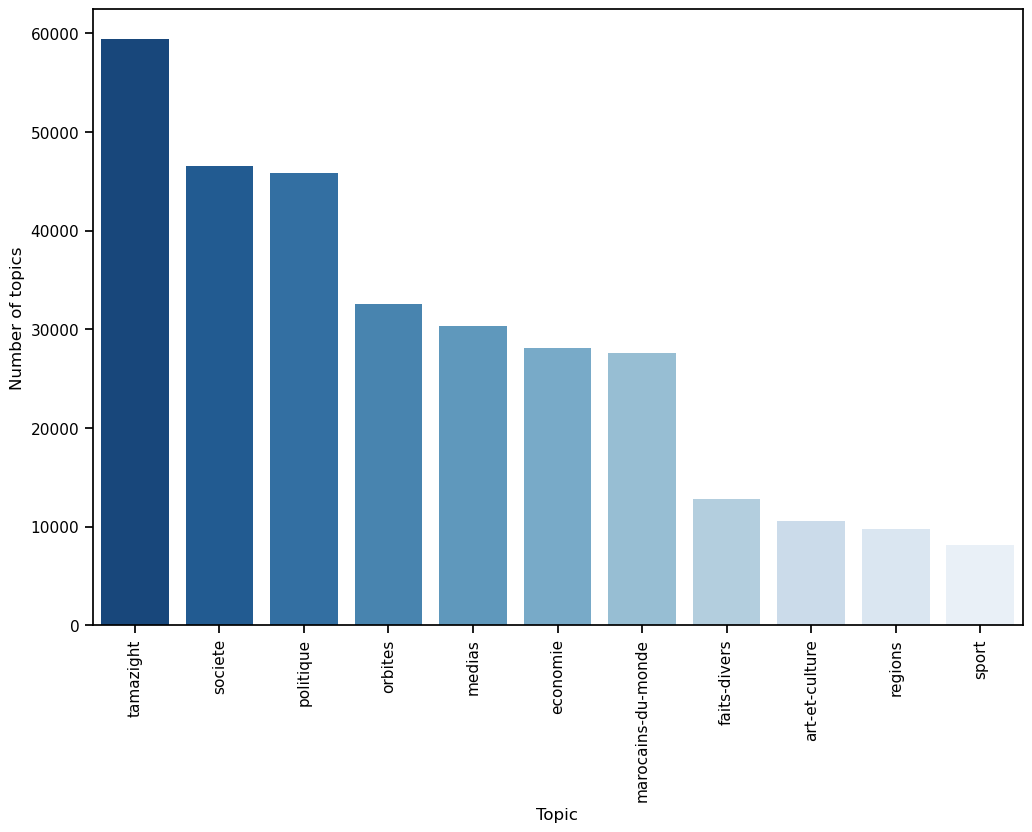

In [10]:
sorted_df = df['topic'].value_counts().reset_index().rename(columns={'index': 'Topic', 'topic': 'Count'})
sorted_df = sorted_df.sort_values(by='Count', ascending=False)

n_colors = len(sorted_df)
custom_colors = sns.color_palette("Blues", n_colors=n_colors)
custom_colors = custom_colors[::-1]  # Reverse the color list

plt.figure(figsize=(12, 8))
sns.barplot(data=sorted_df, x='Topic', y='Count', palette=custom_colors)
plt.xticks(rotation=90)

plt.xlabel('Topic')
plt.ylabel('Number of topics')

plt.show()